In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [3]:
train = pd.read_csv('./Dataset/fraudTrain.csv')
test = pd.read_csv('./Dataset/fraudTest.csv')

In [4]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
print(train.describe)
print(test.describe)

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [7]:
X = train[['cc_num','amt','lat','long','merch_lat','merch_long']]
test = test[['cc_num','amt','lat','long','merch_lat','merch_long']]
y = train['is_fraud']

In [8]:
X.isnull().sum()

cc_num        0
amt           0
lat           0
long          0
merch_lat     0
merch_long    0
dtype: int64

In [9]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

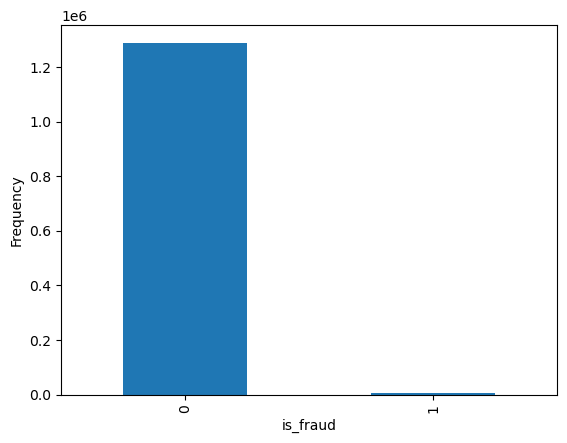

In [10]:
# Imbalanced Dataset
y.value_counts().plot(kind = 'bar')
plt.ylabel('Frequency')
plt.show()

In [11]:
X

,cc_num,amt,lat,long,merch_lat,merch_long
0,2703186189652095,4.97,36.0788,-81.1781,36.011293,-82.048315
1,630423337322,107.23,48.8878,-118.2105,49.159047,-118.186462
2,38859492057661,220.11,42.1808,-112.2620,43.150704,-112.154481
3,3534093764340240,45.00,46.2306,-112.1138,47.034331,-112.561071
4,375534208663984,41.96,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,36.841266,-111.690765
1296671,6011149206456997,51.70,39.2667,-77.5101,38.906881,-78.246528
1296672,3514865930894695,105.93,32.9396,-105.8189,33.619513,-105.130529
1296673,2720012583106919,74.90,43.3526,-102.5411,42.788940,-103.241160


In [12]:
# Splitting train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train

,cc_num,amt,lat,long,merch_lat,merch_long
741541,676234256292,105.99,34.2980,-114.1560,33.817199,-115.003550
268287,213195754007681,12.25,41.2001,-92.1354,41.764939,-92.043364
1175073,180018375329178,47.63,42.3703,-84.2485,43.256029,-84.814479
1252348,3533012926413100,157.54,43.2237,-75.1612,43.311113,-75.982677
815516,3506040590383211,110.70,45.1939,-112.0568,45.830128,-111.828261
...,...,...,...,...,...,...
110268,6528911529051375,72.38,45.8327,-91.0144,45.043710,-90.231846
259178,377895991033232,2.33,41.4682,-72.5751,40.711495,-71.670634
131932,3583293909206278,118.27,35.0203,-106.5503,34.849069,-106.219762
671155,30143713661454,5.60,48.6669,-96.5969,47.807830,-97.498754


In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
sc = StandardScaler()
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)
test = sc.transform(test)

In [15]:
X_test

array([[-0.31621205, -0.28636366,  0.40007084,  0.76319468,  0.35970209,
         0.80453618],
       [-0.31618899, -0.69686244,  0.83351974, -2.46653777,  0.81515831,
        -2.4063886 ],
       [-0.31260748, -0.82905697,  0.27223509,  0.73944538,  0.37035729,
         0.80215671],
       ...,
       [-0.31618436, -0.38024804,  1.22034205,  1.18988517,  1.10473402,
         1.24883003],
       [-0.31592211, -0.68900987,  0.05504967,  0.71268793, -0.00848828,
         0.64895903],
       [-0.31348954, -0.69972055,  0.11572114,  0.4201293 , -0.03652065,
         0.43902047]])

In [24]:
# Logistic Regression (94.83504439090168)
params = {
  'C': [0.01, 0.1, 1]
}

lr_model = LogisticRegression()
grid_search = GridSearchCV(lr_model, param_grid=params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'C': 0.1}
Best Score: 0.8686301458195095
Accuracy of the best model: 0.9483504439090168
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    425413
           1       0.08      0.77      0.15      2490

    accuracy                           0.95    427903
   macro avg       0.54      0.86      0.56    427903
weighted avg       0.99      0.95      0.97    427903



In [25]:
# Decision Trees (92.20851454652106)

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1)
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the best model: 0.9220851454652106
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    425413
           1       0.06      0.82      0.11      2490

    accuracy                           0.92    427903
   macro avg       0.53      0.87      0.53    427903
weighted avg       0.99      0.92      0.95    427903



In [26]:
# Random Forest (95.55179561723101)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the Random Forest model: 0.9555179561723101
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    425413
           1       0.09      0.77      0.17      2490

    accuracy                           0.96    427903
   macro avg       0.55      0.86      0.57    427903
weighted avg       0.99      0.96      0.97    427903



In [17]:
# XGBoost (94.51815014150403)

xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best XGBoost model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the best XGBoost model: 0.9451815014150403
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    425413
           1       0.08      0.80      0.15      2490

    accuracy                           0.95    427903
   macro avg       0.54      0.87      0.56    427903
weighted avg       0.99      0.95      0.97    427903



In [18]:
# Voting Ensemble
vc_model = VotingClassifier(estimators = [
  ("lr", LogisticRegression(C = 0.01)),
  ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1)),
  ('xgb', XGBClassifier()),
])

vc_model.fit(X_train_resampled, y_train_resampled)

y_pred = vc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost model:", accuracy)

In [ ]:
# Bagging Ensemble
base_estimator = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1)

bc_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100)

bc_model.fit(X_train_resampled, y_train_resampled)

y_pred = bc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost model:", accuracy)